## Final Project
### DSC 530
### Milan Sherman

Import libraries and load data

In [29]:
import pandas as pd
import numpy as np
import thinkstats2
import thinkplot


bb = pd.read_csv (r'C:\Users\misherman\DS-520\Baseball Datasets\mlbbatting1901-2021.csv')


In [30]:
bb = bb.rename(columns={'Pos Summary': 'position'})
print (bb.columns)

Index(['ID', 'Player', 'Date', 'Tm', 'Opp', 'Rslt', 'PA', 'AB', 'R', 'H', '2B',
       '3B', 'HR', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SH', 'SF', 'ROE', 'GDP',
       'SB', 'CS', 'WPA', 'RE24', 'aLI', 'BOP', 'position', 'DFS(DK)',
       'DFS(FD)'],
      dtype='object')


In [31]:
print (bb.shape)

(4285629, 31)


Below I create singles from the other variables in the data by subtracting the number of doubles, triples, and home runs from hits

In [32]:
bb['1B'] = bb['H'] - (bb['2B'] + bb['3B'] + bb['HR'])

In [33]:
bb.head()

,ID,Player,Date,Tm,Opp,Rslt,PA,AB,R,H,...,SB,CS,WPA,RE24,aLI,BOP,position,DFS(DK),DFS(FD),1B
0,crossmo01,Monte Cross,1901-04-18,PHI,BRO,L 7-12,5,4,2,2,...,0,NaN,NaN,NaN,NaN,8,SS,NaN,NaN,1
1,dahlebi01,Bill Dahlen,1901-04-18,BRO,PHI,W 12-7,5,4,2,3,...,2,NaN,NaN,NaN,NaN,7,SS,NaN,NaN,3
2,dalyto01,Tom Daly,1901-04-18,BRO,PHI,W 12-7,5,5,1,2,...,0,NaN,NaN,NaN,NaN,6,2B,NaN,NaN,1
3,davisle01,Lefty Davis,1901-04-18,BRO,PHI,W 12-7,5,5,1,1,...,0,NaN,NaN,NaN,NaN,1,LF,NaN,NaN,1
4,delahed01,Ed Delahanty,1901-04-18,PHI,BRO,L 7-12,5,4,1,2,...,0,NaN,NaN,NaN,NaN,3,1B,NaN,NaN,2


I create functions to generate the IQR and use it to idenitfy outliers in each variable

In [34]:
# calculate IQR
def IQR(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    print("IQR value for column %s is: %s" % (col, IQR))

 

In [35]:
# Identifying the outliers
def Outliers(data, col):
    
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
    
    global outlier_free_list
    global filtered_data
    outlier_list = []
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_list = [x for x in data[col] if (
        (x < lower_range) | (x > upper_range))]
    outliers = np.unique(outlier_list)
    return outliers

I generate a histogram, descriptive statistics, IQR, and outliers for each variable below.

## At bats

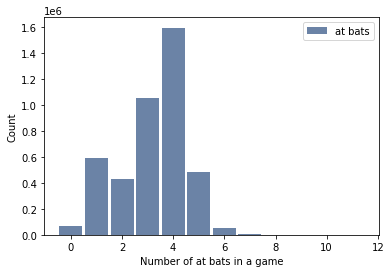

In [36]:
hist = thinkstats2.Hist(bb['AB'], label='at bats')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of at bats in a game', ylabel='Count')

In [37]:
bb.AB.describe()

count    4.285629e+06
mean     3.217964e+00
std      1.313924e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      1.100000e+01
Name: AB, dtype: float64

In [38]:
IQR(bb, 'AB')

IQR value for column AB is: 2.0


In [39]:
Outliers(bb, 'AB')

array([ 8,  9, 10, 11])

In [40]:
bb.AB.value_counts().sort_index()

0       71512
1      591099
2      427946
3     1052468
4     1598029
5      485481
6       49274
7        7740
8        1587
9         381
10         98
11         14
Name: AB, dtype: int64

## Hits

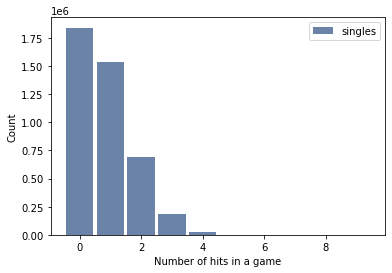

In [41]:
hist = thinkstats2.Hist(bb['H'], label='singles')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of hits in a game', ylabel='Count')

In [42]:
bb.H.describe()

count    4.285629e+06
mean     8.391662e-01
std      8.974112e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.000000e+00
Name: H, dtype: float64

In [43]:
IQR(bb, 'H')

IQR value for column H is: 1.0


In [44]:
Outliers(bb, 'H')

array([3, 4, 5, 6, 7, 9])

In [45]:
bb.H.value_counts().sort_index()

0    1841452
1    1539882
2     690018
3     183371
4      28330
5       2459
6        112
7          4
9          1
Name: H, dtype: int64

## Singles

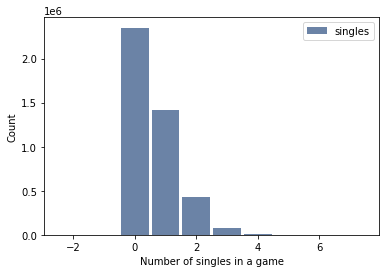

In [46]:
hist = thinkstats2.Hist(bb['1B'], label='singles')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of singles in a game', ylabel='Count')

In [47]:
bb['1B'].describe()

count    4.285629e+06
mean     5.953877e-01
std      7.602834e-01
min     -2.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      7.000000e+00
Name: 1B, dtype: float64

In [48]:
bb['1B'].value_counts() 

 0    2350482
 1    1414744
 2     433632
 3      78013
 4       8235
 5        500
 6         20
 7          1
-1          1
-2          1
Name: 1B, dtype: int64

I noticed that singles have a few negative values, which doesn't make sense.  I am chalking this up as bad data and removing these observations and generating the histogram again without these values.

In [49]:
bb.drop(bb.loc[bb['1B']==-1].index, inplace=True)
bb.drop(bb.loc[bb['1B']==-2].index, inplace=True)

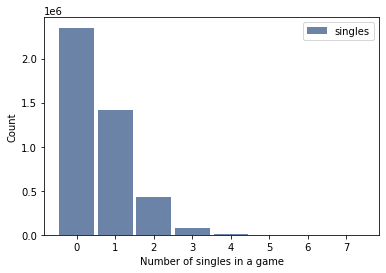

In [50]:
hist = thinkstats2.Hist(bb['1B'], label='singles')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of singles in a game', ylabel='Count')

In [51]:
IQR(bb, '1B')

IQR value for column 1B is: 1.0


In [52]:
Outliers(bb, '1B')

array([3, 4, 5, 6, 7])

## Doubles

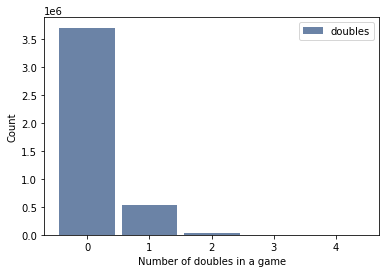

In [53]:
hist = thinkstats2.Hist(bb['2B'], label='doubles')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of doubles in a game', ylabel='Count')

In [54]:
bb['2B'].describe()

count    4.285627e+06
mean     1.460377e-01
std      3.830144e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.000000e+00
Name: 2B, dtype: float64

In [55]:
IQR(bb, '2B')

IQR value for column 2B is: 0.0


In [56]:
Outliers(bb, '2B')

array([1, 2, 3, 4])

In [57]:
bb['2B'].value_counts().sort_index()

0    3704837
1     537715
2      41125
3       1902
4         48
Name: 2B, dtype: int64

## Triples

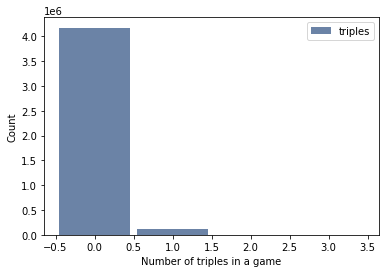

In [58]:
hist = thinkstats2.Hist(bb['3B'], label='triples')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of triples in a game', ylabel='Count')

In [59]:
bb['3B'].describe()

count    4.285627e+06
mean     2.633944e-02
std      1.635267e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+00
Name: 3B, dtype: float64

In [60]:
IQR(bb, '3B')

IQR value for column 3B is: 0.0


In [61]:
Outliers(bb, '3B')

array([1, 2, 3])

In [62]:
bb['3B'].value_counts().sort_index()

0    4175045
1     108331
2       2203
3         48
Name: 3B, dtype: int64

## Home Runs

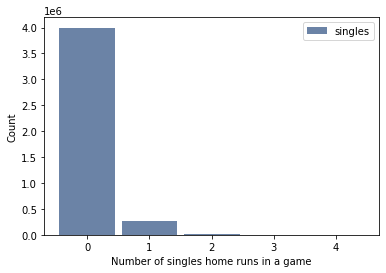

In [63]:
hist = thinkstats2.Hist(bb['HR'], label='singles')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of singles home runs in a game', ylabel='Count')

In [64]:
bb['HR'].describe()

count    4.285627e+06
mean     7.140075e-02
std      2.729843e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.000000e+00
Name: HR, dtype: float64

In [65]:
IQR(bb, 'HR')

IQR value for column HR is: 0.0


In [66]:
Outliers(bb, 'HR')

array([1, 2, 3, 4])

In [67]:
bb['HR'].value_counts().sort_index()

0    3996579
1     272743
2      15677
3        612
4         16
Name: HR, dtype: int64

## Summary

In general, each of these variables is positively skewed, with the skew become more prounounced from hits, to single, double, and triples and home runs.  This makes sense for a couple reasons:
1. At-bats are slightly positively skewed due to extra inning games.  Since a baseball game cannot end in a tie, the teams keep playing until one team wins, which can result in many more at-bats than the median (3).
2. Hits in general, and each type of hit (single, double, triple, home run) are a function of at-bats, i.e., you can only get a hit if you have an at-bat.  Most players have a batting average between .200 and .350, meaning that they only get a hit every one in three to five times at bat (the mean in this data is about 0.8 hits per game).  Thus, it is most likely that a player gets no hits or one hit during a game.   
3.  Singles are the easiest type of hit to get, followed by doubles.  It is not uncommon to have multiple singles and doubles in a game (but almost always more singles than doubles).  Triples are actually the hardest hit to get because it's difficult to round three bases with the ball in play (note that the mean and max for triples is less than home runs). A triple requires some luck on where the ball goes and a player who can run fast. A home run is knocked out of the playing area, so it's simply a matter of hitting the ball far. 

## Outliers

Every one of these variables has outliers due to the fact that there is a large amount of data and hits are not easy to get in baseball.   This results in an IQR equal to one for hits and singles, and an IQR equal to 0 for the other types of hits.  With such a tight distribution, even one double, for example, is an outlier despite the fact that most games usually have multiple doubles.  The only metric where it might make sense to remove the outliers is at-bats, as the outliers for this variable almost certainly came in extra-inning games.  However, a very small percent of the data are outliers and the data do not indicate which games went into extra innings, so I will leave them.

## Comparing Distributions

I now create two dataframes, one for firstbasemen, and another all other positions (except pitchers), and compare the distribution of different type of hits using a pmf.  I am excluding pitchers as they are notoriously bad hitters and would skew the comparison in favor first basemen.

In [68]:
firstbasemen = bb[bb.position == '1B']
other = bb[(bb['position'] == '2B') | (bb['position'] == '3B')  | (bb['position'] == 'SS')  | (bb['position'] == 'LF')  | (bb['position'] == 'CF')  | (bb['position'] == 'RF')  | (bb['position'] == 'C')]

In [69]:
firstbasemen.head()

,ID,Player,Date,Tm,Opp,Rslt,PA,AB,R,H,...,SB,CS,WPA,RE24,aLI,BOP,position,DFS(DK),DFS(FD),1B
4,delahed01,Ed Delahanty,1901-04-18,PHI,BRO,L 7-12,5,4,1,2,...,0,NaN,NaN,NaN,NaN,3,1B,NaN,NaN,2
10,kellejo01,Joe Kelley,1901-04-18,BRO,PHI,W 12-7,5,5,1,3,...,1,NaN,NaN,NaN,NaN,4,1B,NaN,NaN,2
28,delahed01,Ed Delahanty,1901-04-19,PHI,BRO,L 2-10,4,4,0,0,...,0,NaN,NaN,NaN,NaN,3,1B,NaN,NaN,0
35,doyleja01,Jack Doyle,1901-04-19,CHC,STL,W 8-7,5,5,2,4,...,0,NaN,NaN,NaN,NaN,5,1B,NaN,NaN,4
37,ganzejo01,John Ganzel,1901-04-19,NYG,BSN,L 0-7,4,4,0,0,...,0,NaN,NaN,NaN,NaN,6,1B,NaN,NaN,0


Below I generate the pmf for first basemen compared to all other positions for singles, which are not power hits, and home runs, which are.  Although any hit that nets more than one base (doubles, triples, and home runs), home runs are a key power hitting metric. 

In [70]:
first_singles_pmf = thinkstats2.Pmf(firstbasemen['1B'], label='firstbaseman')
other_singles_pmf = thinkstats2.Pmf(other['1B'], label='other')

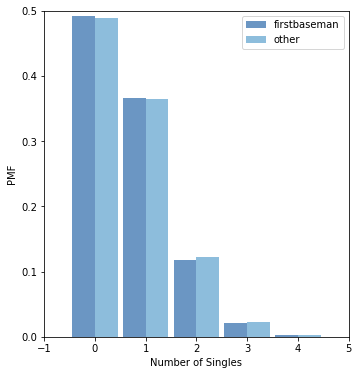

In [71]:
width=0.45
axis = [-1, 5, 0, 0.5]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_singles_pmf, align='right', width=width)
thinkplot.Hist(other_singles_pmf, align='left', width=width)
thinkplot.Config(xlabel='Number of Singles', ylabel='PMF', axis=axis)

In [72]:
first_HR_pmf = thinkstats2.Pmf(firstbasemen.HR, label='firstbaseman')
other_HR_pmf = thinkstats2.Pmf(other.HR, label='other')

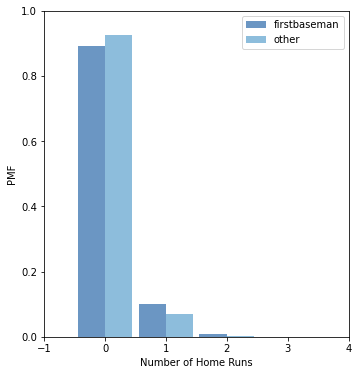

In [73]:
width=0.45
axis = [-1, 4, 0, 1]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_HR_pmf, align='right', width=width)
thinkplot.Hist(other_HR_pmf, align='left', width=width)
thinkplot.Config(xlabel='Number of Home Runs', ylabel='PMF', axis=axis)

It appears that firstbasemen tend to hit fewer singles (they have a slightly higher proportion of 0 single games, and a slightly lower proportion of multiple single games) and more home runs than other position players (lower proportion of 0 home run games, and higher proportion of one or two home run games).

## Cumulative Distribution Function

When comparing players' metrics, it is worth considering the number of at-bats that a player has had.  One reason for this is that players with fewer at-bats are more likley to be outliers with respect these metrics due to the smaller sample of at-bats.  In general, the more at-bats a player has the better sense we have of that player's true hitting ability.  Hot streaks and slumps are often talked about in baseball, where a player hits above or below their career numbers for a period of time.  For players with fewer at-bats in their career, their career could be dominated by such a streak.

I begin by aggregating the dataset by player, and then create the CDF of at-bats.

In [74]:
player = bb.groupby('ID').agg(
    H = pd.NamedAgg(column='H', aggfunc = sum),
    AB = pd.NamedAgg(column='AB', aggfunc = sum),
    singles = pd.NamedAgg(column='1B', aggfunc = sum),
    doubles = pd.NamedAgg(column='2B', aggfunc = sum),
    triples = pd.NamedAgg(column='3B', aggfunc = sum),
    HR = pd.NamedAgg(column='HR', aggfunc = sum), 
    R = pd.NamedAgg(column='R', aggfunc = sum))
player.shape

(15985, 7)

This dataset has almost 16k unique players.

In [75]:
at_bats_pmf = thinkstats2.Pmf(player['AB'], label='at_bats')

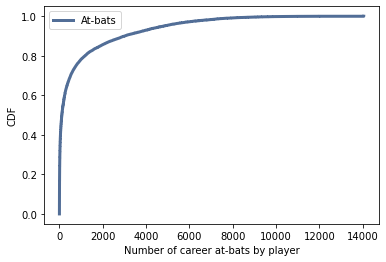

<Figure size 576x432 with 0 Axes>

In [76]:
cdf = thinkstats2.Cdf(at_bats_pmf, label='At-bats')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Number of career at-bats by player', ylabel='CDF')

While some player (or players) have had as many 14k at-bats, it appears that about 80% of players in this dataset have had fewer than 2000 at-bats.  With an average of 3.2 at-bats per game, and 162 games in a season, we estimate that on average a player gets about 518 at-bats per season.  Thus, we can hypothesize that 80% of the players in this dataset played fewer than 4 full seasons in the Major Leagues.

## Hitting Metrics by position

In order to answer the question about whether first basemen tend to be better power hitters than other positions, I aggregate the hitting metrics by position 

In [77]:
positions = bb[(bb['position'] == '2B') | (bb['position'] == '1B')  | (bb['position'] == '3B')  | (bb['position'] == 'SS')  | (bb['position'] == 'LF')  | (bb['position'] == 'CF')  | (bb['position'] == 'RF')  | (bb['position'] == 'C')].groupby('position').agg(
    H = pd.NamedAgg(column='H', aggfunc = sum),
    AB = pd.NamedAgg(column='AB', aggfunc = sum),
    singles = pd.NamedAgg(column='1B', aggfunc = sum),
    doubles = pd.NamedAgg(column='2B', aggfunc = sum),
    triples = pd.NamedAgg(column='3B', aggfunc = sum),
    HR = pd.NamedAgg(column='HR', aggfunc = sum))

In [78]:
print(positions)

               H       AB  singles  doubles  triples     HR
position                                                   
1B        413151  1500133   278197    75460    11585  47909
2B        398873  1504067   295757    68185    13205  21726
3B        393415  1482968   276803    70283    11333  34996
C         355838  1414003   255207    62737     7614  30280
CF        413498  1512672   294001    70345    16912  32240
LF        410787  1492992   282581    72429    14855  40922
RF        410047  1489167   279405    72998    14899  42745
SS        382904  1481104   285869    64067    12962  20006


I now create the relevant metrics from the aggregated variables: at bats, hits, singles, doubles, triples, and HR.

In [79]:
positions['BA'] = positions.H/positions.AB
positions['slug'] = (positions.singles + 2*positions.doubles + 3*positions.triples + 4*positions.HR)/positions.AB
positions['ISO'] = positions.slug - positions.BA
positions['single_pct'] = positions.singles/positions.AB
positions['double_pct'] = positions.doubles/positions.AB
positions['triple_pct'] = positions.triples/positions.AB
positions['HR_pct'] = positions.HR/positions.AB
print(positions)

               H       AB  singles  doubles  triples     HR        BA  \
position                                                                
1B        413151  1500133   278197    75460    11585  47909  0.275410   
2B        398873  1504067   295757    68185    13205  21726  0.265196   
3B        393415  1482968   276803    70283    11333  34996  0.265289   
C         355838  1414003   255207    62737     7614  30280  0.251653   
CF        413498  1512672   294001    70345    16912  32240  0.273356   
LF        410787  1492992   282581    72429    14855  40922  0.275143   
RF        410047  1489167   279405    72998    14899  42745  0.275353   
SS        382904  1481104   285869    64067    12962  20006  0.258526   

              slug       ISO  single_pct  double_pct  triple_pct    HR_pct  
position                                                                    
1B        0.436967  0.161557    0.185448    0.050302    0.007723  0.031937  
2B        0.371424  0.106227    0.1966

I have generated a few metrics for power hitters in this dataframe:
1.  Slugging percentage: this is a weighted average of a player’s hits by number of bases that they average per at-bat. It is computed using the following formula: (singles + 2* doubles + 3* triples + 4* home runs)/at-bats
2. Isolated power: a player’s slugging percentage minus their batting average.  Batting average gives the same weight to every hit, regardless of how many bases it gets.  By subtracting batting average from slugging percentage, we isolate a player’s extra base hits.
3. Home run percentage: As the raw number of home runs is as much a function of number of at bats as it is number of home runs, dividing by the number of at-bats allows us to normalize this metric to see if a player tends to hit more or fewer home runs than other players.

We see that first basemen lead all position players in slugging percentage, isolated power, and home runs, which suggests that they are better power hitters than other position players.  Later will consider the degree to which these differences are real versus being due to chance.

## Scatterplots and Correlation: Slugging Percentage and Runs Scored

A question that we have not addressed yet is "Why do we care if firstbasemen tend to be better power hitters?".  Or more generally, why is power hitting important?  In order to investigate this question, I will compare the relationship between slugging percentage and runs scored.  While it takes more than scoring runs to win a baseball game, it is certainly an important part of winning as the team that scores more runs wins the game.

In order to generate a dataset to investigate this question, I will aggregagte the original dataset by player and compute slugging percentage and total runs scored.  

In [80]:
player = bb.groupby('ID').agg(
    H = pd.NamedAgg(column='H', aggfunc = sum),
    AB = pd.NamedAgg(column='AB', aggfunc = sum),
    singles = pd.NamedAgg(column='1B', aggfunc = sum),
    doubles = pd.NamedAgg(column='2B', aggfunc = sum),
    triples = pd.NamedAgg(column='3B', aggfunc = sum),
    HR = pd.NamedAgg(column='HR', aggfunc = sum), 
    R = pd.NamedAgg(column='R', aggfunc = sum))


In [81]:
player['BA'] = player.H/player.AB
player['slug'] = (player.singles + 2*player.doubles + 3*player.triples + 4*player.HR)/player.AB
player.head() 

,H,AB,singles,doubles,triples,HR,R,BA,slug
ID,,,,,,,,,
aardsda01,0,4,0,0,0,0,0,0.000000,0.000000
aaronha01,3703,12121,2253,614,96,740,2128,0.305503,0.555152
aaronto01,216,944,155,42,6,13,99,0.228814,0.327331
aasedo01,0,5,0,0,0,0,0,0.000000,0.000000
abadan01,2,21,2,0,0,0,1,0.095238,0.095238


From the head of this dataframe, we see that some players had very few at bats in this dataset, which will create some noisy data.  I will restrict the data to players with a minimum of 100 at-bats to address this issue.  Given that a player must have 502 plate appearances in a season to be considered for a batting title (highest batting average in the league), this does not seem unreasonable.  

In [82]:
player = player[player.AB > 99]

In [83]:
slug = player.slug.values
runs = player.R.values

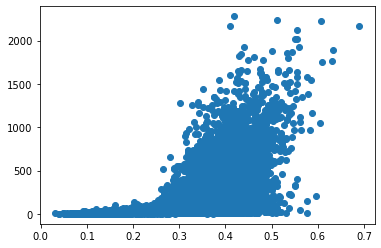

In [84]:
import matplotlib.pyplot as plt

plt.scatter(slug, runs)
plt.show()

This scatterplot doesn't clearly display the relationship between slugging percentage and runs because the number of runs that a player scores in their career is also a function of the number of at-bats.  Thus, even though we limited the dataset to players with at least 100 at-bats, there is still a large disrepancy in the number of at-bats in the dataset, as can be seen below.

In [85]:
player.AB.value_counts().sort_index()

100      24
101      27
102      19
103      24
104      22
         ..
11438     1
11551     1
11988     1
12121     1
14053     1
Name: AB, Length: 3419, dtype: int64

To address this issue, I will normalize the number of runs using the number of at-bats.  This will put runs and slugging percentage on the same scale, as sluggling percentage is also normalized by the number of at-bats.

In [86]:
player['R_norm'] = player.R/player.AB
runs = player.R_norm.values

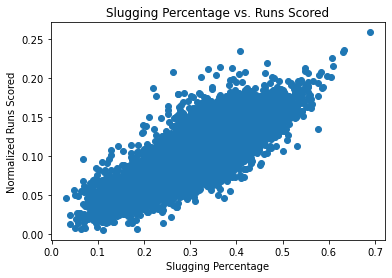

In [87]:
plt.scatter(slug, runs)
plt.title("Slugging Percentage vs. Runs Scored")
plt.xlabel("Slugging Percentage")
plt.ylabel("Normalized Runs Scored")
plt.show()

In [88]:
import scipy
scipy.stats.pearsonr(slug,runs)

(0.8093559672699049, 0.0)

This scatterplot depicts a strong positive relationship between these variables, which is quantified with a Pearson correlation coefficient of 0.81.  For context, I generate the scatterplot of batting average and runs scored, and the correlation coefficient for these variables below.

In [89]:
batting_avg = player.BA.values

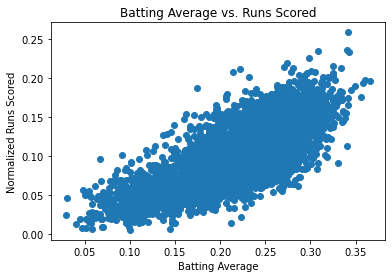

In [90]:
plt.scatter(batting_avg, runs)
plt.title("Batting Average vs. Runs Scored")
plt.xlabel("Batting Average")
plt.ylabel("Normalized Runs Scored")
plt.show()

In [91]:
scipy.stats.pearsonr(batting_avg, runs)

(0.7642475709788003, 0.0)

For comparison, the correlation coefficient for normalized runs scored and batting average is 0.76, so batting average is not a highly correlated with runs scored as slugging percentage is.  

# Regression Models

Having examined the relationship between runs scored and slugging percentage, and between runs scored and batting average, I now create a simple linear regression model for each.

### Generating the Least Squares regression line for slugging percentage

In [92]:
def LeastSquares(x, y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    n = len(x)
    num = 0
    denom = 0
    for i in range(n):
        num += (x[i] - x_bar)*(y[i] - y_bar)
        denom += (x[i] - x_bar)**2
        m = num/denom
        b = y_bar - (m*x_bar)
    return(m, b)

In [93]:
m = LeastSquares(slug,runs)[0]
print('Slope =', m)
b = LeastSquares(slug,runs)[1]
print('y-intercept =', b)
y_slug = b + m * slug

Slope = 0.2951748853414154
y-intercept = 0.0105200520494627


Generate R squared for the model

In [94]:
from sklearn.metrics import r2_score
r2_score(runs, y_slug)

0.6550570817554033

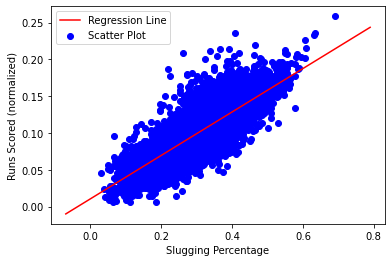

In [95]:
#  Plotting Values and Regression Line
 
max_x = np.max(slug) + .1
min_x = np.min(slug) - .1
 
# Calculating line values x and y
x = np.linspace(min_x, max_x, 15)
y = b + m * x
 
# Ploting Line
plt.plot(x, y, color='red', label='Regression Line')
# Ploting Scatter Points
plt.scatter(slug, runs, c='blue', label='Scatter Plot')
 
plt.xlabel('Slugging Percentage')
plt.ylabel('Runs Scored (normalized)')
plt.legend()
plt.show()

This model predicts that when slugging percentage is 0, then the normalized runs scored will be very close to 0 as well, which makes sense.  In addition, when slugging percentage increases by 1, normalized runs scored will increase by .295.  However, the range of values for slugging percentage is between 0 and 0.8, so it might be better to interpret the model in terms of a 0.1 increase in slugging percentage, or a 10% increase, which translates to an increase of .0295 normalized runs scored. This means an increase of about .03 runs scored per at-bat for every 10% increase in slugging percentage.  For context, the highest runs scored per at-bat in the dataset is around .25, associated with a slugging percentage of around .700.  Finally, the R squared value indicates that slugging percentage explains about 65.5% of the variability in runs scored.

### Generate the Least Squares regression line for batting average

In [96]:
m = LeastSquares(batting_avg,runs)[0]
print('Slope =', m)
b = LeastSquares(batting_avg,runs)[1]
print('y-intercept =', b)
y_batting = b + m*batting_avg

Slope = 0.521375612786826
y-intercept = -0.01241675116429504


Generate R squared for the model

In [97]:
r2_score(runs, y_batting)

0.5840743497469963

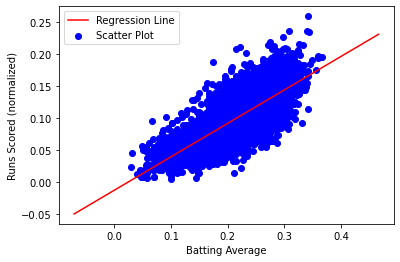

In [98]:
max_x = np.max(batting_avg) + .1
min_x = np.min(batting_avg) - .1
 
# Calculating line values x and y
x = np.linspace(min_x, max_x, 15)
y = b + m * x
 
# Ploting Line
plt.plot(x, y, color='red', label='Regression Line')
# Ploting Scatter Points
plt.scatter(batting_avg, runs, c='blue', label='Scatter Plot')
 
plt.xlabel('Batting Average')
plt.ylabel('Runs Scored (normalized)')
plt.legend()
plt.show()

Similar to the model for slugging percentage, the model for batting average predicts that when batting average is 0, then the normalized runs scored will be very close to 0 as well, which also makes sense as slugging percentage is the same as batting average but weighted by the number of bases netted by a hit.  In this model, when batting average increases by 1, normalized runs scored will increase by .521.  However, the range of values for batting average is much tighter, between 0 and 0.350.  This means an increase of about .05 runs scored per at-bat for every 10% increase in batting average, but the highest runs scored per at-bat in the dataset is around .25, associated with a batting average of around .350, which is about half of the largest slugging percentage.  Finally, batting average accounts for about 58.4% of the variability in runs scored.

## Hypothesis Testing

From the dataframe aggregated by position, firstbasemen have a higher slugging percentage, isolated power, and home run percentage than other position players.  The question is whether the difference in statistically significant.  To answer that question, we will perform a hypothesis test, but first I need to determine my test statistics.  

Given that the above percentages are already aggregated by position, we lose information about the size of the sample, i.e., the sensitivity of the hypothesis test is affected by the sample size, and thus the aggregated metrics depicted above won't work.  Another thought is to calculate each of these metrics by player by game, but that data would be very noisy.  As we have seen, the mode for any type of hit is 0, and the mode for at-bats is 4.  As all of these metrics are normalized by the number of at-bats, these metrics would tend to vary wildly from game to game due to the small sample size per player per game.  

Instead, I will use the mean of the numerator of these metrics as my test statistic.  For slugging percentage, this is just the number bases gained by hits in a game, i.e. singles + 2* doubles + 3* triples + 4* home runs.  For isolated power it is the same, but without the singles.  For home run percentage, we will just use the number of home runs.  The hypothesis test will do the aggregation when computing the means.

Finally, in order to do a two sample hypothesis test, I will aggregate the dataframe by firstbasemen and all other field players, i.e., excluding pitchers, and run a hypothesis test on these metrics.

### Hypothesis for Testing Difference of Means

I begin by creating the number of bases due to hits and the number of extra bases (number of bases due to hits without singles)  in the original dataset (note that the number of home runs is already in the dataset)

In [99]:
bb['bases'] = bb['1B'] + 2*bb['2B'] + 3*bb['3B'] + 4*bb['HR']
bb['Xbases'] =  2*bb['2B'] + 3*bb['3B'] + 4*bb['HR']
bb.head()

,ID,Player,Date,Tm,Opp,Rslt,PA,AB,R,H,...,WPA,RE24,aLI,BOP,position,DFS(DK),DFS(FD),1B,bases,Xbases
0,crossmo01,Monte Cross,1901-04-18,PHI,BRO,L 7-12,5,4,2,2,...,NaN,NaN,NaN,8,SS,NaN,NaN,1,3,2
1,dahlebi01,Bill Dahlen,1901-04-18,BRO,PHI,W 12-7,5,4,2,3,...,NaN,NaN,NaN,7,SS,NaN,NaN,3,3,0
2,dalyto01,Tom Daly,1901-04-18,BRO,PHI,W 12-7,5,5,1,2,...,NaN,NaN,NaN,6,2B,NaN,NaN,1,3,2
3,davisle01,Lefty Davis,1901-04-18,BRO,PHI,W 12-7,5,5,1,1,...,NaN,NaN,NaN,1,LF,NaN,NaN,1,1,0
4,delahed01,Ed Delahanty,1901-04-18,PHI,BRO,L 7-12,5,4,1,2,...,NaN,NaN,NaN,3,1B,NaN,NaN,2,2,0


I now split out my dataframe by position again, i.e., firstbasemen and field players (without pitchers).

In [100]:
firstbase = bb[bb.position == '1B']
others = bb[(bb['position'] == '2B') | (bb['position'] == '3B')  | (bb['position'] == 'SS')  | (bb['position'] == 'LF')  | (bb['position'] == 'CF')  | (bb['position'] == 'RF')  | (bb['position'] == 'C')]

In [101]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

#### Testing the Difference of Means of Total Bases

In [102]:
data = firstbase.bases.values, others.bases.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

The p-value indicates that the probability of the difference between in mean total bases between the two groups being due to chance is 0.  

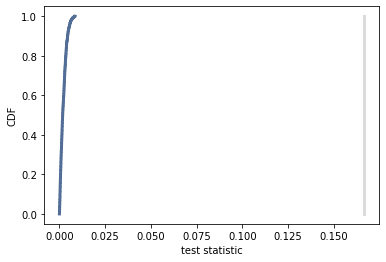

In [103]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF')

Since we know that first basemen have a higher slugging percentage than other field players, we conduct a one-way hypopthesis test to test the more specific hypothesis that the mean for first basemen is larger (vs. just being different) than other field players

In [104]:
class DiffMeansOneSided(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.mean() - group2.mean()
        return test_stat

In [105]:
ht = DiffMeansOneSided(data)
pvalue = ht.PValue()
pvalue

0.0

The p-value for the one-sided hypothesis test is also 0, confirming that first basemen tend to net more bases on hits than other field players as a group.

#### Testing the Difference of Means of Extra Bases

In [106]:
data = firstbase.Xbases.values, others.Xbases.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

The p-value indicates that the probability of the difference between in mean extra bases between the two groups being due to chance is 0. 

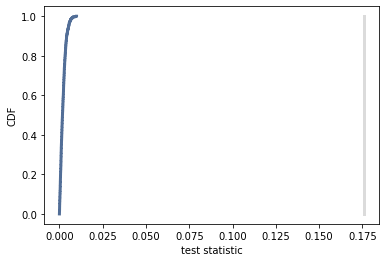

In [107]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF')

Since we know that first basemen have a higher isolated power than other field players, we conduct a one-way hypopthesis test to test the more specific hypothesis that the mean for first basemen is larger (vs. just being different) than other field players

In [108]:
ht = DiffMeansOneSided(data)
pvalue = ht.PValue()
pvalue

0.0

The p-value for the one-sided hypothesis test is also 0, confirming that first basemen tend to hit more extra base hits than other field players as a group.

#### Testing the Difference of Means of Home Runs

In [109]:
data = firstbase.HR.values, others.HR.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

The p-value indicates that the probability of the difference between in mean home runs between the two groups being due to chance is 0. 

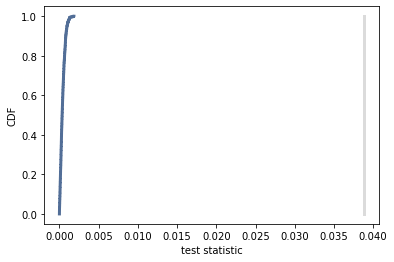

In [110]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF')

Since we know that first basemen have a higher isolated power than other field players, we conduct a one-way hypopthesis test to test the more specific hypothesis that the mean for first basemen is larger (vs. just being different) than other field players

In [111]:
ht = DiffMeansOneSided(data)
pvalue = ht.PValue()
pvalue

0.0

The p-value for the one-sided hypothesis test is also 0, confirming that first basemen tend to hit more home runs than other field players as a group.

## Analytic Distribution of Slugging Percentage

Below I examine whether the distribution of slugging percentage among players in this dataset is normal.

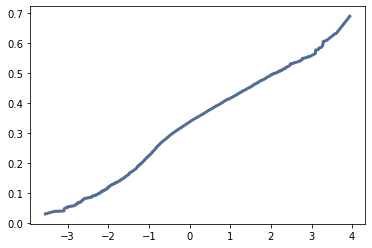

In [112]:
xs, ys = thinkstats2.NormalProbability(slug)
thinkplot.Plot(xs, ys, label='Slugging Percentage')

In [113]:
def MakeNormalPlot(values):
    mean = values.mean()
    std = values.std()
    xs = [-4, 4]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color='gray', label='model')

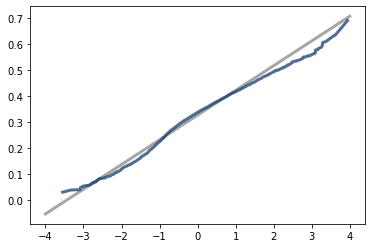

In [114]:
MakeNormalPlot(slug)
thinkplot.Plot(xs, ys, label='Slugging Percentage')

Slugging percentage seems to be approximately normal, with the exception of the tails of the distribution. The left in particular seems to deviate from a normal distribution.  One explanation is that observations at both ends of the distribution are associated with players with fewer at-bats, and thus are deviate from what is expected by an anlytic distribution.  Note that we have already filtered out players with fewer than 100 at-bats in their career for this reason.  Below I look at the distribution of at-bats by player to see if further raising the threshold for number of at-bats is warranted.

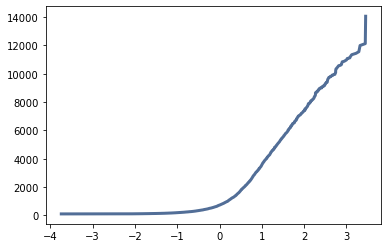

In [115]:
AB = player.AB.values
xs, ys = thinkstats2.NormalProbability(AB)
thinkplot.Plot(xs, ys, label='At Bats')

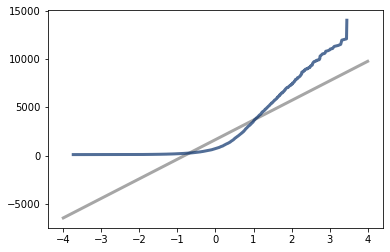

In [116]:
MakeNormalPlot(AB)
thinkplot.Plot(xs, ys, label='At Bats')

At bats are not normally distributed, but are extremely positively skewed.  As we noted in the CDF of at-bats, 80% of players in this data (or approximately 13k players) had fewer than 2000 at-bats, while the other 20% (or 3k players) had between 2000 and 14000 at-bats. Below we investigate the distribution of at-bats further.

In [117]:
player.AB.describe()

count     8226.000000
mean      1654.731947
std       2033.152061
min        100.000000
25%        267.000000
50%        725.500000
75%       2295.250000
max      14053.000000
Name: AB, dtype: float64

The fact that the median number of at bats is less than half the mean futher supports that the distribution is positively skewed, with half the players in the sample having less than 725 at bats for their career.  Furthermore, 25%, or approximately 2000 players have between 100 and 267 at bats for their career.  

An important consideration to take into account is that there is an underlying relationship in this data that has yet be accounted for by this analysis.  A player who is not a good hitter is likely to get fewer at bats than a player who is for at least two reasons.
1. Players who don't hit well don't play in the Major Leagues as long as those who do, so they will have fewer at-bats.
2. Players who are excellent defenders but poor hitters might hold a spot on the roster as a defensive specialist, whose role is to sub into a game in the later innings if his team has a lead.  If such a player regularly plays only the last couple of innings, and even then only in games where his team is winning, he will have fewer at-bats.  

To test this hypothesis, I create a scatterplot of at-bats and batting average, and of at-bats and slugging percentage, and check the correlation of each.

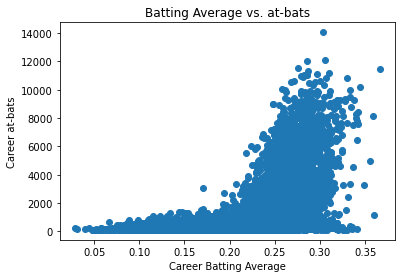

(0.529135377597978, 0.0)

In [118]:
at_bats = player.AB.values

plt.scatter(batting_avg, at_bats)
plt.title("Batting Average vs. at-bats")
plt.xlabel("Career Batting Average")
plt.ylabel("Career at-bats")
plt.show()
scipy.stats.pearsonr(batting_avg, at_bats)

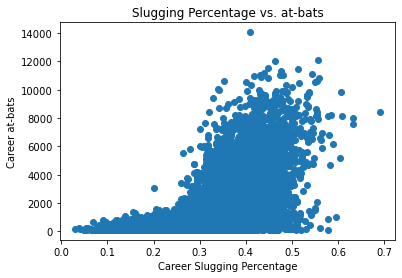

(0.5535017118971135, 0.0)

In [119]:
plt.scatter(slug, at_bats)
plt.title("Slugging Percentage vs. at-bats")
plt.xlabel("Career Slugging Percentage")
plt.ylabel("Career at-bats")
plt.show()
scipy.stats.pearsonr(slug, at_bats)

Indeed, we see that players with a batting average below .200 or a slugging percentage below .300 get considerably fewer at-bats than players above these marks.  Both metrics are positively correlated with at-bats and have a correlation coefficient above 0.5.  The question is whether the analysis is biased by including players with fewer at-bats or by removing them.  Regardless, it would be interesting to replicate this analysis with players with more than 2000 at bats in their career to see how it compares, given that this is the point at which we start to see more variation in the relationship between at-bats and these hitting statistics.